# Baseline Models

Testing Logistic Regression and Random Forest as baselines before moving to more complex models.


In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

sys.path.append('..')
from utils.metrics import *

SEED = 42
np.random.seed(SEED)


Matplotlib is building the font cache; this may take a moment.


## Load Data


In [2]:
DATA_PATH = '../data/processed/'

# Load SMOTE data
X_train_smote = pd.read_pickle(DATA_PATH + 'X_train_smote.pkl')
y_train_smote = pd.read_pickle(DATA_PATH + 'y_train_smote.pkl')

# Load Random Undersampling data
X_train_rus = pd.read_pickle(DATA_PATH + 'X_train_rus.pkl')
y_train_rus = pd.read_pickle(DATA_PATH + 'y_train_rus.pkl')

# Load test set (used for evaluation)
X_test = pd.read_pickle(DATA_PATH + 'X_test.pkl')
y_test = pd.read_pickle(DATA_PATH + 'y_test.pkl')

print("SMOTE data:")
print(f"  Train: {len(X_train_smote)}, Fraud: {y_train_smote.sum()} ({y_train_smote.mean()*100:.1f}%)")
print("\nRandom Undersampling data:")
print(f"  Train: {len(X_train_rus)}, Fraud: {y_train_rus.sum()} ({y_train_rus.mean()*100:.1f}%)")
print(f"\nTest: {len(X_test)}, Fraud: {y_test.sum()} ({y_test.mean()*100:.2f}%)")


SMOTE data:
  Train: 454902, Fraud: 227451 (50.0%)

Random Undersampling data:
  Train: 788, Fraud: 394 (50.0%)

Test: 56962, Fraud: 98 (0.17%)


## Logistic Regression (SMOTE)


In [3]:
lr_smote = LogisticRegression(max_iter=1000, random_state=SEED)
lr_smote.fit(X_train_smote, y_train_smote)

lr_smote_pred = lr_smote.predict(X_test)
lr_smote_prob = lr_smote.predict_proba(X_test)[:, 1]
lr_smote_metrics = calculate_all_metrics(y_test, lr_smote_pred, lr_smote_prob)

print("Logistic Regression (SMOTE):")
for k, v in lr_smote_metrics.items():
    print(f"  {k}: {v:.4f}")


Logistic Regression (SMOTE):
  precision: 0.0581
  recall: 0.9184
  f1_score: 0.1094
  auc_pr: 0.7249
  auc_roc: 0.9698


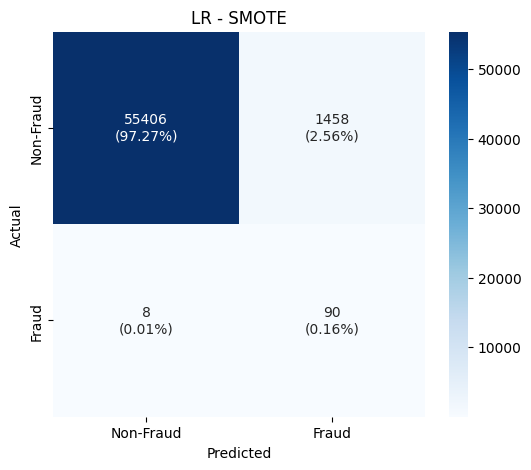

In [4]:
plot_confusion_matrix(y_test, lr_smote_pred, 'LR - SMOTE')
plt.show()


In [5]:
# LR with Random Undersampling
lr_rus = LogisticRegression(max_iter=1000, random_state=SEED)
lr_rus.fit(X_train_rus, y_train_rus)

lr_rus_pred = lr_rus.predict(X_test)
lr_rus_prob = lr_rus.predict_proba(X_test)[:, 1]
lr_rus_metrics = calculate_all_metrics(y_test, lr_rus_pred, lr_rus_prob)

print("Logistic Regression (Random Undersampling):")
for k, v in lr_rus_metrics.items():
    print(f"  {k}: {v:.4f}")


Logistic Regression (Random Undersampling):
  precision: 0.0384
  recall: 0.9184
  f1_score: 0.0738
  auc_pr: 0.6778
  auc_roc: 0.9760


## Random Forest (SMOTE)


In [6]:
rf_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED, n_jobs=-1)
rf_smote.fit(X_train_smote, y_train_smote)

rf_smote_pred = rf_smote.predict(X_test)
rf_smote_prob = rf_smote.predict_proba(X_test)[:, 1]
rf_smote_metrics = calculate_all_metrics(y_test, rf_smote_pred, rf_smote_prob)

print("Random Forest (SMOTE):")
for k, v in rf_smote_metrics.items():
    print(f"  {k}: {v:.4f}")


Random Forest (SMOTE):
  precision: 0.4264
  recall: 0.8571
  f1_score: 0.5695
  auc_pr: 0.8142
  auc_roc: 0.9819


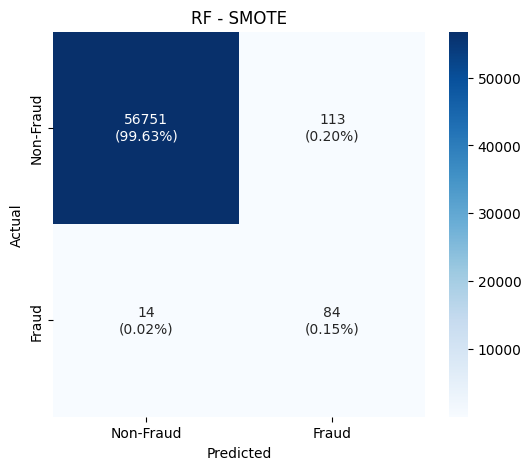

In [7]:
plot_confusion_matrix(y_test, rf_smote_pred, 'RF - SMOTE')
plt.show()


In [8]:
# RF with Random Undersampling
rf_rus = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED, n_jobs=-1)
rf_rus.fit(X_train_rus, y_train_rus)

rf_rus_pred = rf_rus.predict(X_test)
rf_rus_prob = rf_rus.predict_proba(X_test)[:, 1]
rf_rus_metrics = calculate_all_metrics(y_test, rf_rus_pred, rf_rus_prob)

print("Random Forest (Random Undersampling):")
for k, v in rf_rus_metrics.items():
    print(f"  {k}: {v:.4f}")


Random Forest (Random Undersampling):
  precision: 0.0440
  recall: 0.9082
  f1_score: 0.0838
  auc_pr: 0.6708
  auc_roc: 0.9759


## Comparison


In [9]:
print_metrics_table({
    'LR (SMOTE)': lr_smote_metrics,
    'LR (RUS)': lr_rus_metrics,
    'RF (SMOTE)': rf_smote_metrics,
    'RF (RUS)': rf_rus_metrics
})



Model                 Precision     Recall         F1     AUC-PR    AUC-ROC
LR (SMOTE)               0.0581     0.9184     0.1094     0.7249     0.9698
LR (RUS)                 0.0384     0.9184     0.0738     0.6778     0.9760
RF (SMOTE)               0.4264     0.8571     0.5695     0.8142     0.9819
RF (RUS)                 0.0440     0.9082     0.0838     0.6708     0.9759



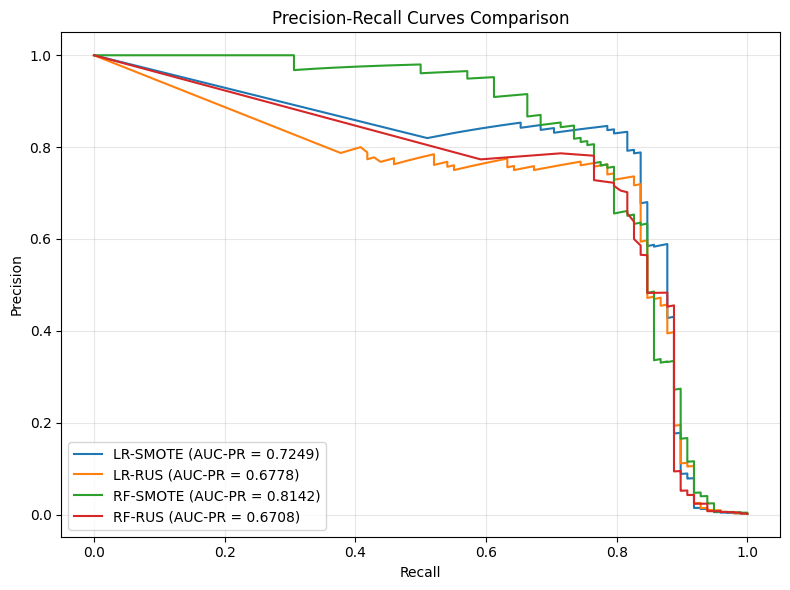

In [10]:
probs = {
    'LR-SMOTE': lr_smote_prob, 'LR-RUS': lr_rus_prob,
    'RF-SMOTE': rf_smote_prob, 'RF-RUS': rf_rus_prob
}
plot_multiple_pr_curves(probs, y_test)
plt.show()


## Save


In [11]:
os.makedirs('../models', exist_ok=True)

joblib.dump(lr_smote, '../models/lr_smote.joblib')
joblib.dump(lr_rus, '../models/lr_rus.joblib')
joblib.dump(rf_smote, '../models/rf_smote.joblib')
joblib.dump(rf_rus, '../models/rf_rus.joblib')

results = {
    'y_test': y_test,
    'lr_smote_prob': lr_smote_prob, 'lr_rus_prob': lr_rus_prob,
    'rf_smote_prob': rf_smote_prob, 'rf_rus_prob': rf_rus_prob,
    'lr_smote_metrics': lr_smote_metrics, 'lr_rus_metrics': lr_rus_metrics,
    'rf_smote_metrics': rf_smote_metrics, 'rf_rus_metrics': rf_rus_metrics
}
joblib.dump(results, '../models/baseline_results.joblib')
print("saved")


saved
